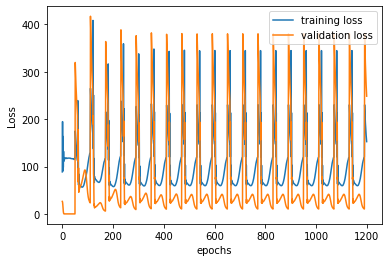

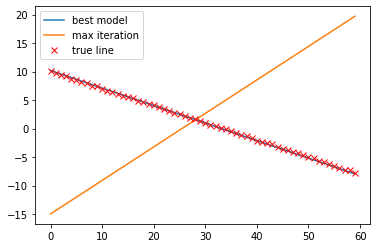

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

class Data(Dataset):
  def __init__(self,train = True):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.f = -3 * self.x +1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]
    if (train):
      self.y[50:]=20

  def __getitem__(self,index):
    return self.x[index],self.y[index]
  
  def __len__(self):
    return self.len

train_data = Data()
val_data = Data(train=False)

class LR(nn.Module):
  def __init__(self,start,end):
    super(LR,self).__init__()
    self.linear = nn.Linear(start,end)
  
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

model = LR(1,1)

split_data = DataLoader(train_data,batch_size=1)

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

LOSS_TRAIN = []
LOSS_VAL = []
min_loss = 1000000

def Training_Model(iter, min_loss):
  for epoch in range(iter):
    for x,y in split_data:
      yhat = model.forward(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()
      train_loss = criterion(model(train_data.x),train_data.y).data
      val_loss = criterion(model(val_data.x),val_data.y).data
      LOSS_TRAIN.append(train_loss)
      LOSS_VAL.append(val_loss)
      optimizer.step()
      if(loss < min_loss):
        val = epoch
        min_loss = loss
        torch.save(model.state_dict(),'best_model.pt')
      
Training_Model(20,min_loss)



# Plot the loss

plt.plot(LOSS_TRAIN, label = 'training loss')
plt.plot(LOSS_VAL, label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.show()


model_best = LR(1,1)

model_best.load_state_dict(torch.load('best_model.pt'))

plt.plot(model_best(val_data.x).data.numpy(), label='best model')
plt.plot(model(val_data.x).data.numpy(),label="max iteration")
plt.plot(val_data.y, 'rx',label='true line')
plt.legend()
plt.show()